In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

jtplot.style()

In [2]:
def show_images(im_dict, cols, shape = (1,1), length = None, size = 8):
    if not length:
        length = len(im_dict)
    else:
        length = max(length, len(im_dict))
    w_size = shape[1] / sum(shape) * size
    h_size = shape[0] / sum(shape) * size
    rows = np.ceil(length / cols)
    fig = plt.figure(figsize=(w_size*cols, h_size*rows))
    i = 0
    for key, value in im_dict.items():
        i += 1
        sub = fig.add_subplot(rows, cols, i)
        sub.set_title(key)
        plt.axis('off')
        plt.imshow(value)
    return fig

In [3]:
fn = 'image.jpg' 
im = cv.imread(fn);
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

img = cv.imread(fn, 0);
img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
img.shape

(1440, 2560, 3)

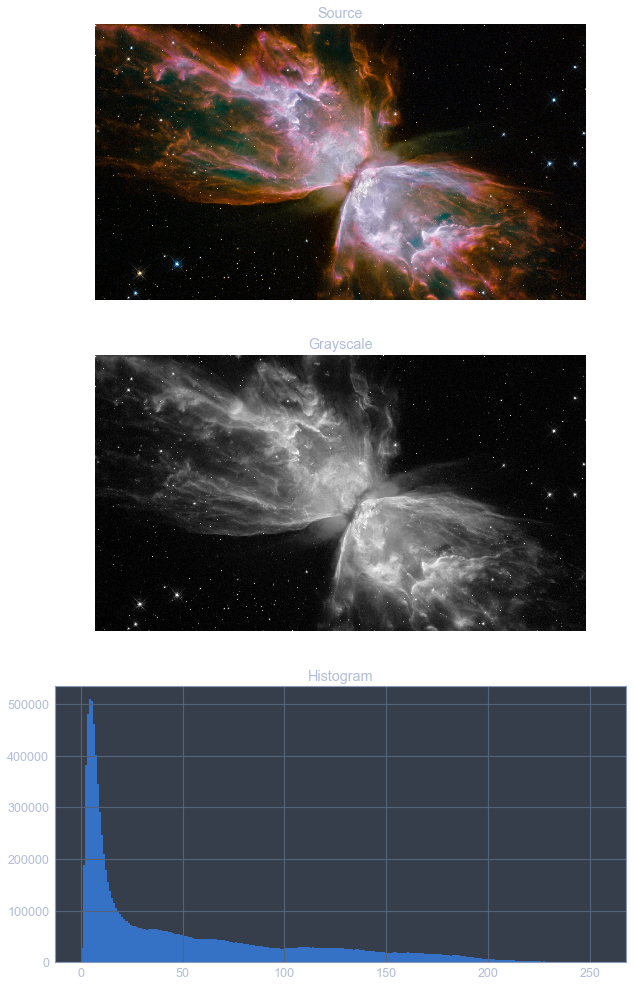

In [5]:
im_dict = {'Source':im, 'Grayscale':img}

cols = 1
size = 16
length = 3
fig = show_images(im_dict, cols, shape = im.shape, size = size, length = length)

hist = cv.calcHist([img],[0],None,[256],[0,256])
sub = fig.add_subplot(3, cols, 3)
sub.set_title("Histogram")
plt.hist(img.ravel(),256,[0,255]);